<h3> Import library yang dibutuhkan </h3>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h3> Read 5 dataset teratas</h3>

In [5]:
df = pd.read_csv('csv_data/data.csv', encoding='latin-1')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


<h3>Pengecekan jumlah baris beserta kolom dalam dataset</h3>

In [12]:
df.info()
print(f"Dataset ini terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB
Dataset ini terdiri dari 13169 baris dan 13 kolom


<h3>Pengecekan adanya duplikasi di dalam dataset </h3>

In [14]:
df.duplicated().sum()

125

<h3>Menghilangkan data duplikasi dan pengecekannya kembali</h3>

In [27]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [93]:
print(f"Dataset ini sekarang terdiri dari {df.shape[0]} baris")

Dataset ini sekarang terdiri dari 13044 baris


<h3> Pengelompokkan tweet yang mengandung kata-kata abusive dan atau hate speech </h3>

In [62]:
def type(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Hate Speech'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'None'

df['Type'] = df.apply(type, axis=1)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target,Level
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual,Weak
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None,None
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None,None,None
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive,Group,Moderate


<h3>Melihat jumlah masing-masing tipe tweet</h3>

In [39]:
df['Type'].value_counts()

None                     5783
Hate Speech & Abusive    3262
Hate Speech              2256
Abusive                  1743
Name: Type, dtype: int64

<h3>Visualisasi jumlah dari  masing-masing tipe tweet</h3>

<Axes: xlabel='Type', ylabel='count'>

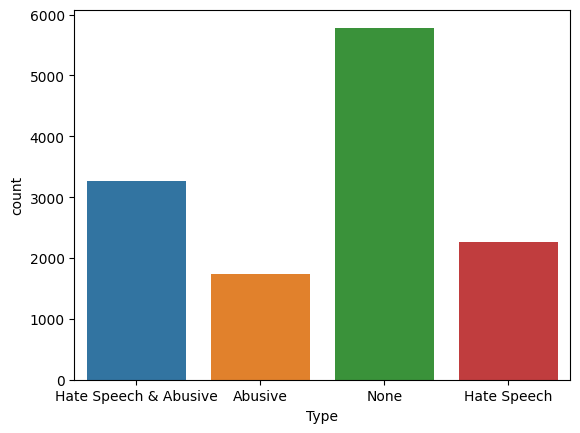

In [44]:
sns.countplot(data=df, x='Type')

<h3> Pengelompokkan tweet yang ditunjukkan ke pihak individual dan atau kelompok </h3>

In [53]:
def target(x):
    if x['HS_Individual'] == 1 and x['HS_Group'] == 0:
        return 'Individual'
    elif x['HS_Individual'] == 0 and x['HS_Group'] == 1:
        return 'Group'
    else:
        return 'None'

df['Target'] = df.apply(target, axis=1)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None,None
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,None,None
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive,Group


<h3>Melihat jumlah masing-masing target tweet</h3>

In [54]:
df['Target'].value_counts()

None          7526
Individual    3540
Group         1978
Name: Target, dtype: int64

<h3>Visualisasi jumlah dari  masing-masing tipe tweet</h3>

<Axes: xlabel='Target', ylabel='count'>

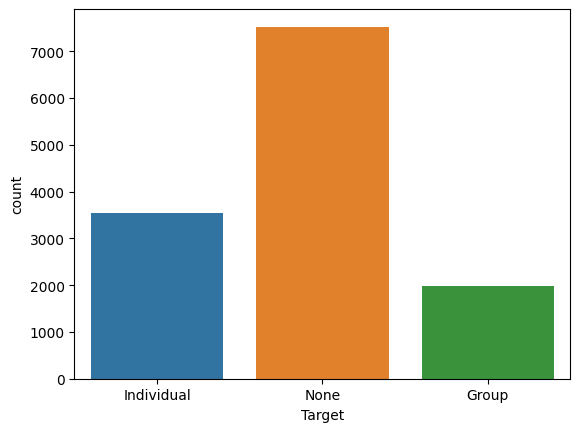

In [55]:
sns.countplot(data=df, x='Target')

<h3> Pengelompokkan level hate speech pada tweet</h3>

In [57]:
def level(x):
    if x['HS_Weak'] == 1:
        return 'Weak'
    elif x['HS_Moderate'] == 1:
        return 'Moderate'
    elif x['HS_Strong'] == 1:
        return 'Strong'
    else:
        return 'None'
    
df['Level'] = df.apply(level, axis = 1)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target,Level
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual,Weak
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None,None
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None,None,None
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive,Group,Moderate


<h3>Melihat jumlah masing-masing level hate speech pada tweet</h3>

In [59]:
df['Level'].value_counts()

None        7526
Weak        3348
Moderate    1698
Strong       472
Name: Level, dtype: int64

<h3>Visualisasi jumlah dari masing-masing level hate speech</h3>

<Axes: xlabel='Level', ylabel='count'>

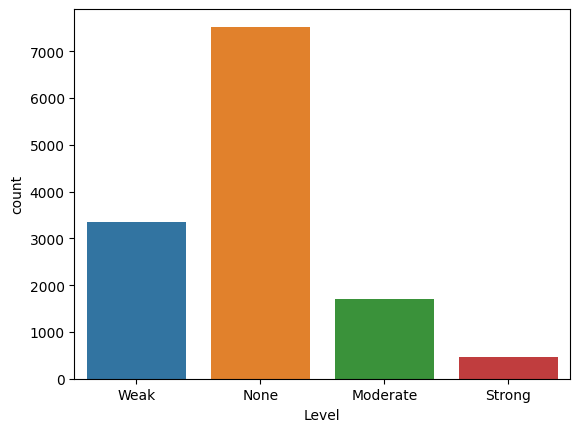

In [61]:
sns.countplot(data=df, x='Level')

<h3>Pengelompokkan hate speech berdasarkan topiknya</h3>

In [64]:
def topic(x):
    if x['HS_Religion'] == 1:
        return 'Religion'
    elif x['HS_Race'] == 1:
        return 'Race'
    elif x['HS_Physical'] == 1:
        return 'Physical'
    elif x['HS_Gender'] == 1:
        return 'Gender' 
    else:
        return 'Other'
    
df['Topic'] = df.apply(topic, axis = 1)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target,Level,Topic
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual,Weak,Other
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None,None,Other
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,Other
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,None,None,None,Other
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive,Group,Moderate,Religion


<h3>Melihat jumlah masing-masing topik hate speech</h3>

In [65]:
df['Topic'].value_counts()

Other       11232
Religion      789
Race          469
Physical      302
Gender        252
Name: Topic, dtype: int64

<h3>Visualisasi dari jumlah topik hate speech</h3>

<Axes: xlabel='Topic', ylabel='count'>

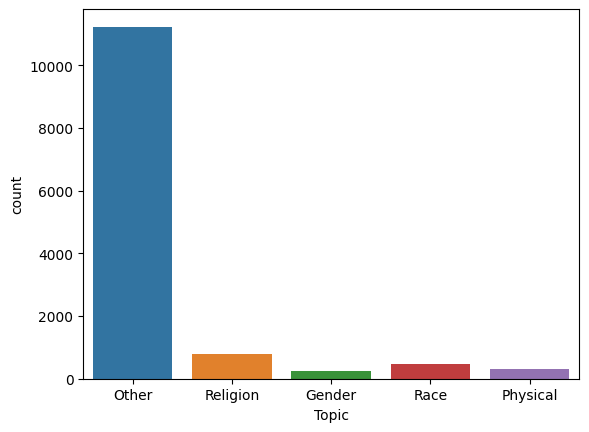

In [66]:
sns.countplot(data=df, x='Topic')

<h3>Visualisasi hate speech berdasarkan topik dan levelnya</h3>

In [86]:
df_none = df[-(df.Level == 'None')]

In [88]:
df_other = df_none[-(df_none.Topic == 'Other')]

<Axes: xlabel='Topic', ylabel='count'>

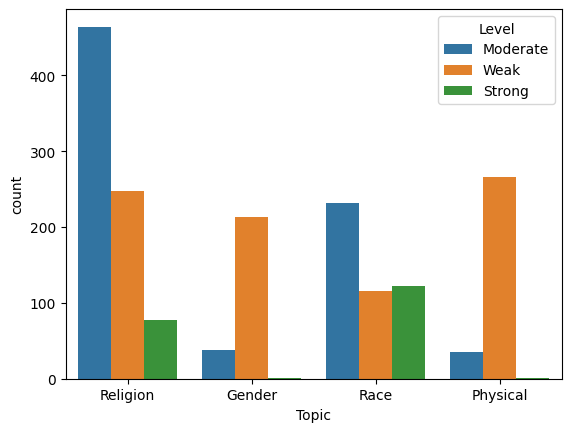

In [97]:
sns.countplot(x ='Topic', hue = "Level", data=df_other)

<h3>Visualisasi hate speech berdasarkan target dan levelnya</h3>

<Axes: xlabel='Target', ylabel='count'>

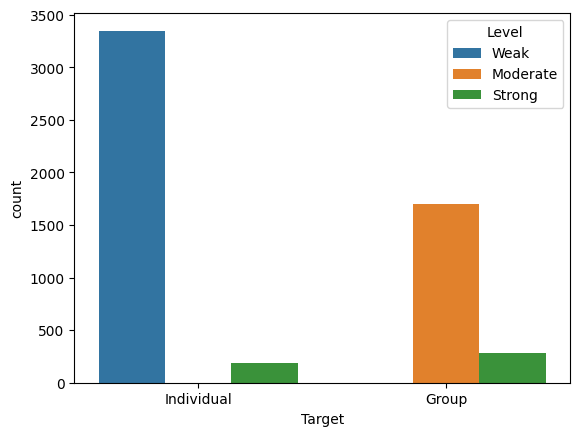

In [96]:
sns.countplot(x ='Target', hue = "Level", data=df_none)